In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
base = pd.read_csv("../Project_1/500_Cities__Obesity_among_adults_aged___18_years.csv")
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [3]:
print(len(base["CityName"].unique()))

475


In [4]:
base["Data_Value"]=base["Data_Value"].str.replace(',', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [5]:
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [6]:
group= base.groupby(["StateDesc","CityName"])
meanvalue = group["Data_Value"].mean()

In [7]:
maxvalue = meanvalue.max()
meanvalue = pd.DataFrame(meanvalue).reset_index()

In [8]:
meanvalue.loc[(meanvalue["Data_Value"]==maxvalue)]

,StateDesc,CityName,Data_Value
240,Indiana,Gary,50.042424


In [9]:
meanvalue

,StateDesc,CityName,Data_Value
0,Alabama,Birmingham,40.329348
1,Alabama,Hoover,29.160000
2,Alabama,Huntsville,35.896667
3,Alabama,Mobile,38.803896
4,Alabama,Montgomery,39.204839
...,...,...,...
495,Wisconsin,Madison,26.304478
496,Wisconsin,Milwaukee,35.874299
497,Wisconsin,Racine,39.504167
498,Wisconsin,Waukesha,30.763636


In [10]:
USDA = pd.read_csv('../data/USDA_Farmers_Market.csv')
USDA.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/17 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/14 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/12 10:38


In [11]:
merged_df = USDA.merge(meanvalue, how = 'left', on = ['CityName', 'StateDesc'])
merged_df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43,NaN
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,Y,N,N,N,N,N,N,10/28/14 9:49,NaN
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,Y,Y,N,N,N,N,N,N,6/5/14 14:40,NaN
8812,1018362,Zimmerman Farmers' Market,http://Pzfarmersmarket.org,Princeton-zimmerman farmers market,NaN,NaN,NaN,25850 Main Street,Zimmerman,Sherburne,...,N,Y,N,N,N,N,N,N,6/22/17 19:37,NaN
8813,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,N,Y,N,N,Y,N,N,N,7/9/16 17:00,NaN
8814,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN


In [12]:
merged_df=merged_df.dropna(subset=["Data_Value"])
merged_df


,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
5,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/15 10:40,31.698101
6,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,N,Y,N,Y,N,N,N,N,4/7/14 16:32,25.034450
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1019247,Your Neighborhood Farmers Market-CityCentre,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,800 Towne and County BLVD.,Houston,Harris,...,N,Y,N,Y,N,Y,N,Y,9/6/18 17:06,34.130144
8794,1019250,Your Neighborhood Farmers Market-Summerwood,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,14303 West Lake Houston Parkway,Houston,Harris,...,Y,Y,Y,Y,N,Y,N,Y,9/6/18 17:23,34.130144
8798,1007324,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,8240 NW 7th Ave,Miami,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,33.482524
8799,1007325,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,15700 NW 20th Ave,Miami Gardens,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,37.864000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd03a086250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd03be33b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd03dc77090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd03be405d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd03be40ad0>],
 'means': []}

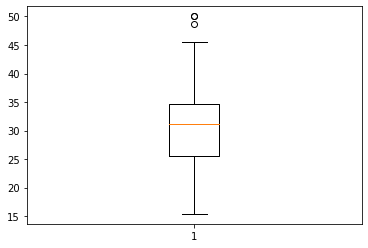

In [13]:
fig1, ax1 = plt.subplots()
ax1.boxplot(merged_df["Data_Value"])

In [14]:
quartiles = merged_df["Data_Value"].quantile([.1,.5,.9])
lowerq = quartiles[0.1]
upperq = quartiles[0.9]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 22.525
The upper quartile is: 38.289772998805226
The interquartile range is: 15.764772998805228
The the median is: 31.074358974358972 


In [15]:
merged_df.loc[(merged_df["Data_Value"]>=38.289772998805226)]

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
27,1009959,2nd Street Market - Five Rivers MetroPark,http://www.metroparks.org,https://www.facebook.com/2ndStreetMarket/,NaN,NaN,NaN,600 E. 2nd Street,Dayton,Montgomery,...,Y,Y,Y,Y,Y,Y,N,Y,7/26/18 16:26,42.967797
31,1005636,32nd Street/Waverly Farmers Market,http://www.32ndstreetmarket.org,https://www.facebook.com/pages/Baltimores-32nd...,NaN,NaN,NaN,E. 32nd & Barclay Street,Baltimore,Baltimore,...,N,Y,N,N,N,N,N,N,7/26/18 16:47,39.562189
36,1011213,441 Ministries Farm Stand,NaN,NaN,NaN,NaN,NaN,441 Parsells Avenue,Rochester,Monroe,...,N,Y,N,N,N,N,N,N,6/8/15 9:22,38.325926
93,1011214,Aenon Baptist Church Farm Stand,NaN,NaN,NaN,NaN,NaN,175 Genesee Street,Rochester,Monroe,...,N,Y,N,N,N,N,N,N,6/8/15 9:24,38.325926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,1012295,Westgate Farmers' Market @ Elder Beerman,http://www.toledofarmersmarket.com,Toledo Farmers Market,NaN,NaN,NaN,3300 Secor Road,Toledo,Lucas,...,N,Y,N,Y,N,N,N,N,7/7/16 9:47,44.304950
8519,1004922,Westside Farmers Market,http://www.westsidemarketrochester.com,https://www.facebook.com/westsidemarketrochester,https://twitter.com/westsideroch,NaN,NaN,831 Genesee Street,Rochester,Monroe,...,N,Y,N,Y,N,N,N,N,6/27/16 13:41,38.325926
8556,1019392,Whitehaven Kulliye Farmers Market,https://whitehavenkulliye.org/the-suq/,NaN,NaN,NaN,NaN,3379 Millbranch Road,Memphis,Shelby,...,N,Y,Y,Y,N,N,N,Y,2/17/19 10:22,39.291111
8617,1005613,Wilmington Farmers Market,http://www.downtownvisions.org,NaN,NaN,NaN,NaN,N King St. & 11th St.,Wilmington,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,39.573077


In [16]:
meanvalue.loc[(meanvalue["Data_Value"]>=38.289772998805226)].count()

StateDesc     45
CityName      45
Data_Value    45
dtype: int64

In [17]:
c_merged_df= merged_df.drop(columns=["FMID","Website","Facebook","Twitter","Youtube","OtherMedia","street","updateTime",
                                   "Season1Date","Season1Time","Season2Date","Season2Time","Season3Date","Season3Time",
                                    "Season4Date","Season4Time",'Location', 'Credit', 'WIC', 'WICcash'])

In [18]:
c_merged_df

,MarketName,CityName,county,StateDesc,zip,x,y,SFMNP,SNAP,Organic,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,Data_Value
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,-81.733940,41.374802,Y,N,-,...,N,N,Y,N,N,N,N,N,N,29.037500
4,112st Madison Avenue,New York,New York,New York,10029,-73.949303,40.793900,Y,N,-,...,N,N,N,N,N,N,N,N,N,25.034450
5,12 South Farmers Market,Nashville,Davidson,Tennessee,37204,-86.790710,36.118370,N,Y,Y,...,Y,N,Y,N,Y,Y,Y,N,N,31.698101
6,125th Street Fresh Connect Farmers' Market,New York,New York,New York,10027,-73.948250,40.808952,Y,Y,Y,...,Y,N,Y,N,Y,N,N,N,N,25.034450
7,12th & Brandywine Urban Farm Market,Wilmington,New Castle,Delaware,19801,-75.534462,39.742119,N,Y,N,...,N,N,Y,N,N,N,N,N,N,39.573077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,Your Neighborhood Farmers Market-CityCentre,Houston,Harris,Texas,77024,-95.386345,29.780472,N,N,Y,...,Y,N,Y,N,Y,N,Y,N,Y,34.130144
8794,Your Neighborhood Farmers Market-Summerwood,Houston,Harris,Texas,77044,-95.177383,29.934114,N,N,Y,...,Y,Y,Y,Y,Y,N,Y,N,Y,34.130144
8798,Youth Stands!,Miami,Miami-Dade,Florida,33150,-80.209282,25.850246,N,Y,Y,...,N,N,N,N,N,N,N,N,N,33.482524
8799,Youth Stands!,Miami Gardens,Miami-Dade,Florida,33054,-80.235390,25.918423,N,Y,Y,...,N,N,N,N,N,N,N,N,N,37.864000


In [19]:
top = c_merged_df.loc[(c_merged_df["Data_Value"]>=38.289772998805226)]
low = c_merged_df.loc[(c_merged_df["Data_Value"]<=22.525)]
low

,MarketName,CityName,county,StateDesc,zip,x,y,SFMNP,SNAP,Organic,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,Data_Value
110,Alameda Farmers' Market,Alameda,Alameda,California,NaN,-122.27676,37.774246,N,N,Y,...,N,N,Y,N,N,N,N,N,N,20.338889
171,Alum Rock Village Farmers' Market,San Jose,Santa Clara,California,NaN,-121.83329,37.367771,N,Y,Y,...,Y,N,Y,N,N,N,N,N,N,20.426047
289,Arvada Farmers Market,Arvada,Jefferson,Colorado,80002,-105.08145,39.800137,N,Y,N,...,N,N,Y,N,N,N,N,N,N,21.582857
290,Arvada Five Parks Farmers Market,Arvada,NaN,Colorado,80005,-105.15500,39.848801,N,N,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582857
404,Ballard Farmers Market,Seattle,King,Washington,98107,-122.38467,47.667591,Y,Y,Y,...,N,Y,Y,Y,Y,Y,Y,N,Y,20.956618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,Wallingford Farmers Market,Seattle,King,Washington,98103,-122.33318,47.663876,Y,Y,Y,...,N,Y,Y,N,N,Y,N,N,N,20.956618
8417,WEST COVINA FARMERS MARKET,West Covina,Los Angeles,California,91790,-117.92151,34.070599,Y,N,Y,...,N,N,Y,N,N,N,N,N,N,21.073529
8464,West Seattle Farmers Market,Seattle,King,Washington,98116,-122.38678,47.561367,Y,Y,Y,...,N,N,Y,N,N,N,N,N,N,20.956618
8610,Willow Glen Farmers' Market,San Jose,Santa Clara,California,95125,-121.90045,37.307304,N,N,Y,...,Y,N,Y,Y,Y,N,N,Y,N,20.426047


In [20]:
top_count= top["Organic"].value_counts()
top_count

-    84
Y    57
N    41
Name: Organic, dtype: int64

In [21]:
top_df= top[['Fruits', 'Grains', 'Juices', 'Vegetables', 'Mushrooms', 'PetFood','Tofu']].apply(pd.Series.value_counts)
low_df= low[['Fruits', 'Grains', 'Juices','Vegetables', 'Mushrooms', 'PetFood','Tofu']].apply(pd.Series.value_counts)
low_df
top_df

,Fruits,Grains,Juices,Vegetables,Mushrooms,PetFood,Tofu
N,28,118,93,8,115,122,141
Y,117,27,52,137,30,23,4


In [22]:
# df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
# df2.plot.bar();
# df2.plot.bar(stacked=True)

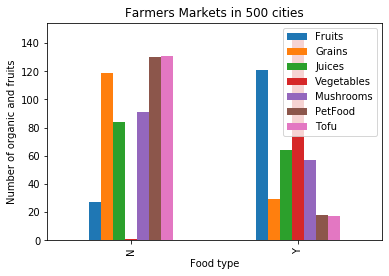

In [23]:
# fru_org= c_merged_df[['Organic', 'Fruits']].apply(pd.Series.value_counts)
x_axis = low_df.index
y_axis = low_df.values
# drug_reg_counts=cleaned_df["Drug Regimen"].value_counts()
# x_axis=drug_reg_counts.index
# y_axis=drug_reg_counts.values

low_df.plot(kind="bar", stacked=False)
plt.title("Farmers Markets in 500 cities")
plt.ylabel("Number of organic and fruits")
plt.xlabel("Food type")

plt.xticks(rotation=90)
plt.show()

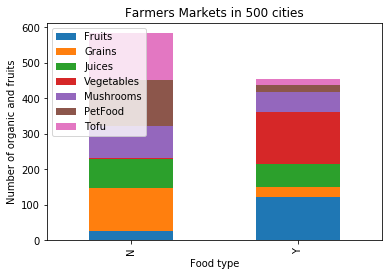

In [24]:
low_df= low[['Fruits', 'Grains', 'Juices', 'Vegetables', 'Mushrooms', 'PetFood','Tofu']].apply(pd.Series.value_counts)
x_axis = low_df.index
y_axis = low_df.values
low_df.plot(kind="bar", stacked=True)
plt.title("Farmers Markets in 500 cities")
plt.ylabel("Number of organic and fruits")
plt.xlabel("Food type")

plt.xticks(rotation=90)
plt.show()

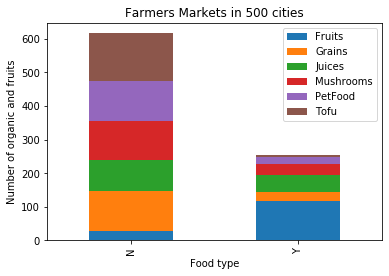

In [25]:
top_df= top[['Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood','Tofu']].apply(pd.Series.value_counts)
x_axis = top_df.index
y_axis = top_df.values
top_df.plot(kind="bar", stacked=True)
plt.title("Farmers Markets in 500 cities")
plt.ylabel("Number of organic and fruits")
plt.xlabel("Food type")
plt.xticks(rotation=90)
plt.show()

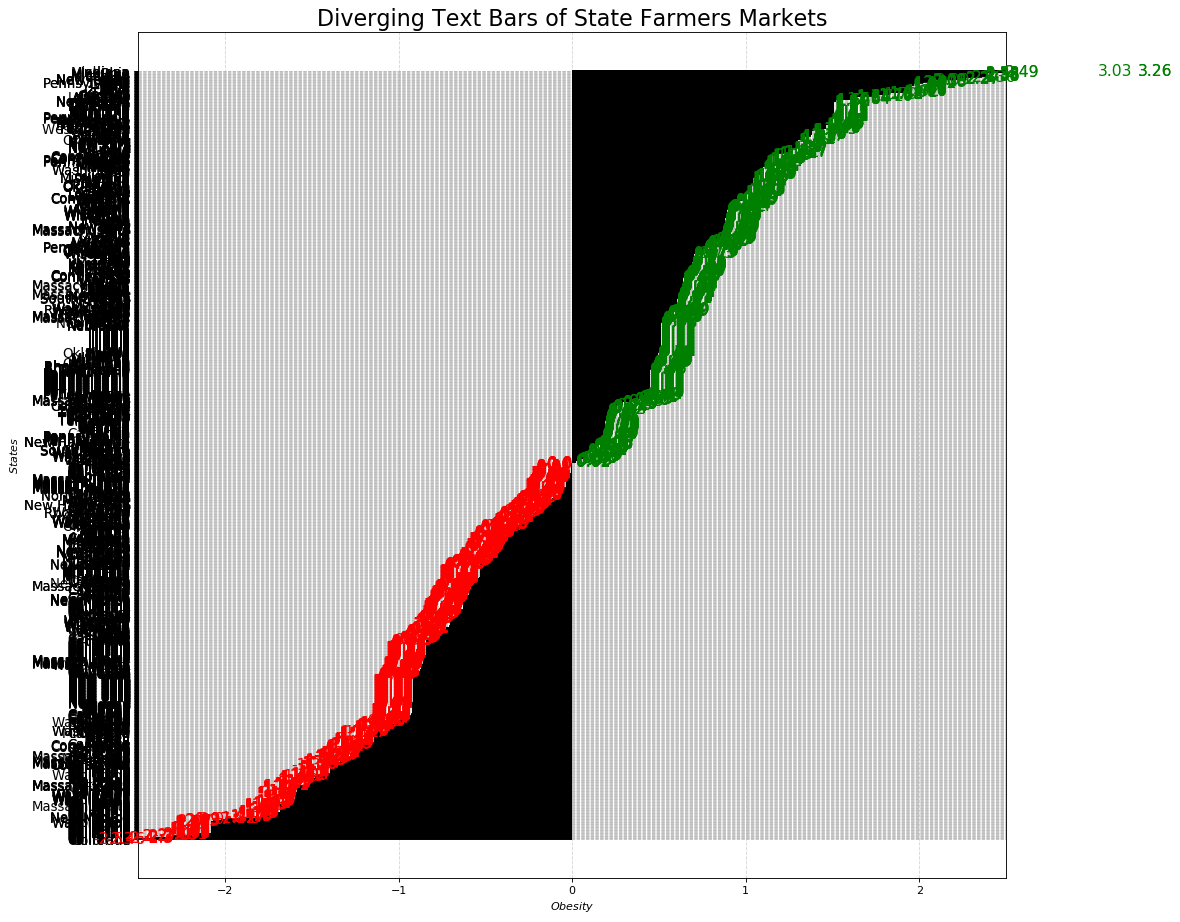

In [26]:
# c_merged_df
x = c_merged_df['Data_Value']
c_merged_df['Data_Value'] = (x - x.mean())/x.std()
c_merged_df['colors'] = ['red' if x < 0 else 'green' for x in c_merged_df['Data_Value']]
c_merged_df.sort_values('Data_Value', inplace=True)
c_merged_df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=c_merged_df.index, xmin=0, xmax=c_merged_df.Data_Value)
for x, y, tex in zip(c_merged_df.Data_Value, c_merged_df.index, c_merged_df.Data_Value):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations 
plt.gca().set(ylabel='$States$', xlabel='$Obesity$')
plt.yticks(c_merged_df.index, c_merged_df.StateDesc, fontsize=12)
plt.title('Diverging Text Bars of State Farmers Markets', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

/Users/maxwelloteng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/maxwelloteng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/maxwelloteng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

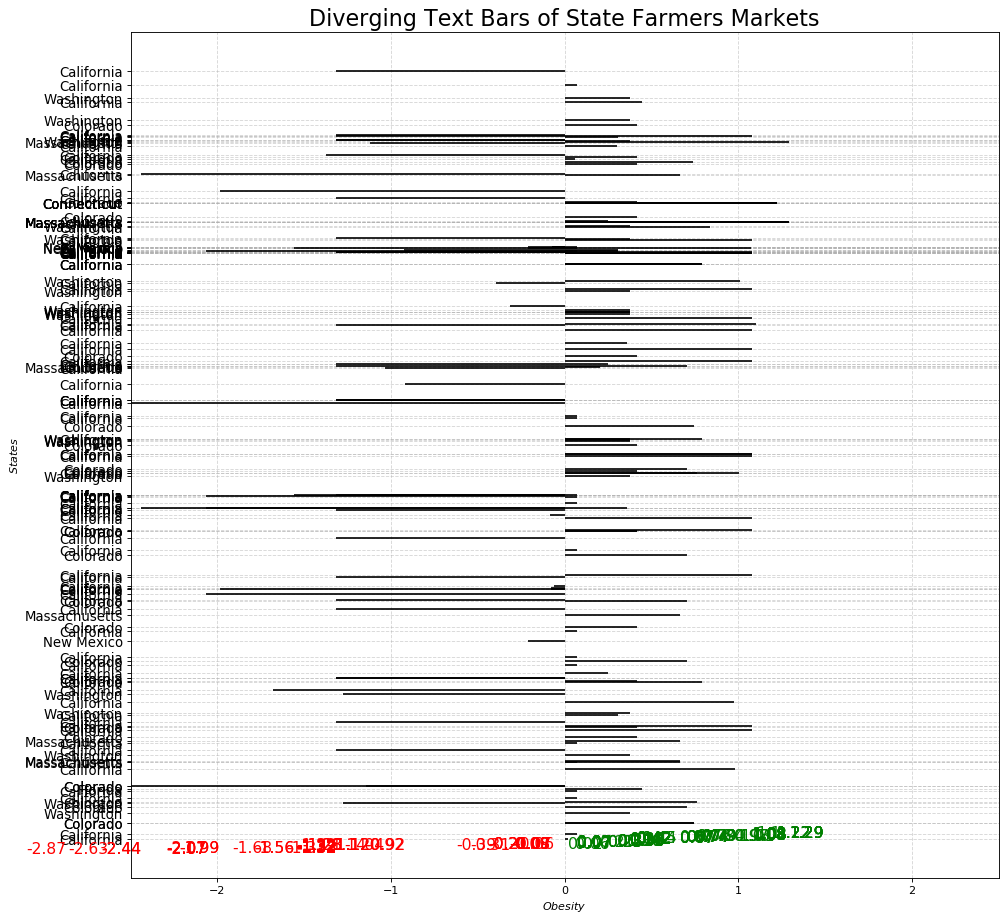

In [27]:
x = low['Data_Value']
low['Data_Value'] = (x - x.mean())/x.std()
low['colors'] = ['red' if x < 0 else 'green' for x in low['Data_Value']]
low.sort_values('Data_Value', inplace=True)
# low.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=low.index, xmin=0, xmax=low.Data_Value)
for x, y, tex in zip(low.Data_Value, c_merged_df.index, low.Data_Value):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations 
plt.gca().set(ylabel='$States$', xlabel='$Obesity$')
plt.yticks(low.index, low.StateDesc, fontsize=12)
plt.title('Diverging Text Bars of State Farmers Markets', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()